# Binary Classification with Logistic Regression

In [41]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# Load the data and clean it

In [42]:
# The dataset is a Heart Attack directory from Kaggle. The goal of the project is to predict whether the patient has heart disease or not. Link to the data: https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction?select=data.csv
df = pd.read_csv('data.csv', na_values='?')

In [43]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [44]:
# rename the target variable
df = df.rename(columns={'num       ': 'target'})
df['target'].value_counts(dropna=False)

0    188
1    106
Name: target, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [46]:
# clean the data. Remove the columns with many missing values and the rows with missing values.
df = df.drop(['slope', 'ca', 'thal'], axis=1)
df = df.dropna().copy()
df.info() #recheck

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  target    261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0


# Exploratory Data Analysis and Feature Selection

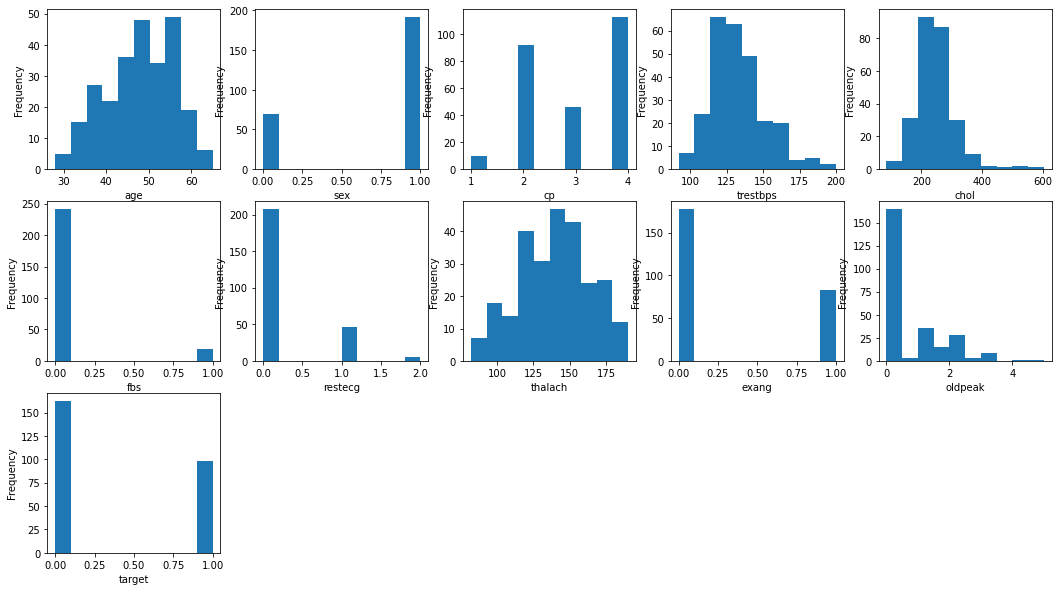

In [48]:
# histogram for all features
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 10))
i=0
for column in df:
    sub=fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1


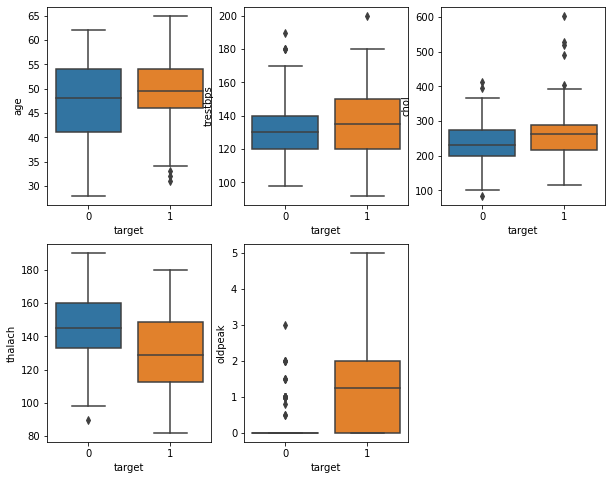

In [49]:
# Numerical Features vs. Target - Box Plot
import seaborn as sns
num_list=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig=plt.figure(figsize=(10, 8))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,3,i+1)
    sns.boxplot(x='target',y=column, data=df)

ANOVA f-test for selecting numerical features

In [50]:
x = df.loc[:, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df.loc[:, 'target']
print(x.head(5))
print(y.head(5))

   age  trestbps   chol  thalach  oldpeak
0   28     130.0  132.0    185.0      0.0
1   29     120.0  243.0    160.0      0.0
3   30     170.0  237.0    170.0      0.0
4   31     100.0  219.0    150.0      0.0
5   32     105.0  198.0    165.0      0.0
0    0
1    0
3    0
4    0
5    0
Name: target, dtype: int64


In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   trestbps  261 non-null    float64
 2   chol      261 non-null    float64
 3   thalach   261 non-null    float64
 4   oldpeak   261 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 12.2 KB


In [52]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [53]:
np.set_printoptions(suppress = True)
fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
print(bestFeatures.scores_)
print(bestFeatures.pvalues_)

[  6.82632116   5.8238516   12.91406861  35.0095821  121.87191614]
[0.00950736 0.01650507 0.00039027 0.00000001 0.        ]


f-score the larger is better. Features 2, 3, 4 are more relevant to the target variable.
However, all the p-values are less than 0.05, which means that for each of these 5 variables, there is a statistically significant difference between the two groups. 

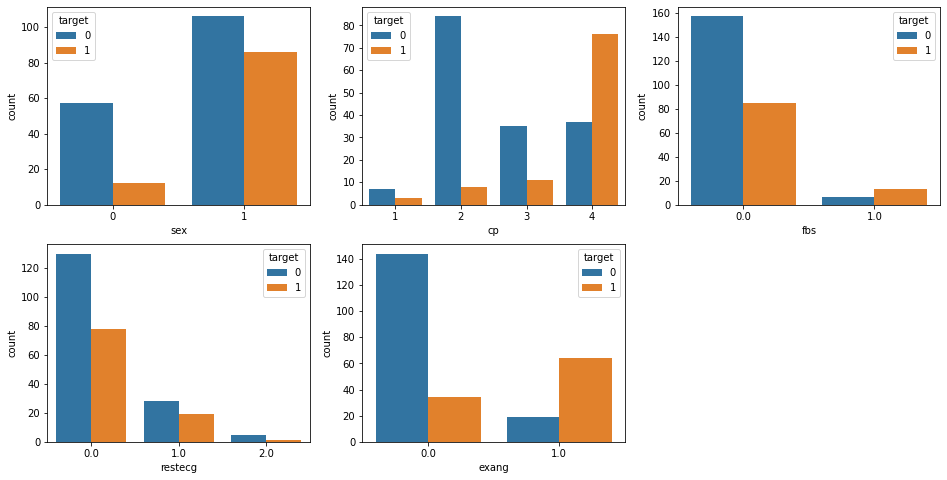

In [54]:
# Categorical Features vs. Target -  Grouped Bar Chart
cat_list=['sex','cp', 'fbs', 'restecg','exang']
fig=plt.figure(figsize=(16,8))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,3,i+1)
    chart=sns.countplot(x=column, hue='target', data=df)

Feature selection for categorical variables using Chi-square

In [56]:
x = df.loc[:, ['sex', 'cp', 'chol', 'fbs', 'restecg','exang']]
y = df.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)

[  4.29633702  20.65657842 214.00321364   7.72294782   0.09613185
  55.39491131]
[0.03819455 0.00000549 0.         0.00545233 0.75652189 0.        ]


The p-value for the feature 'restecg' is larger than 0.05, which means there is no difference of 'restect' between people get heart attack and those has no heart attack 

In [58]:
df_droppedrestecg = df.drop('restecg', axis = 1)
df_droppedrestecg.head(5)

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,165.0,0.0,0.0,0


# Transform the Categorical Variables to Dummy Variables

In [61]:
df_withdummies = pd.get_dummies(df_droppedrestecg, columns=['sex','cp', 'fbs','exang'], drop_first=True)
df_withdummies.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_2,cp_3,cp_4,fbs_1.0,exang_1.0
0,28,130.0,132.0,185.0,0.0,0,1,1,0,0,0,0
1,29,120.0,243.0,160.0,0.0,0,1,1,0,0,0,0
3,30,170.0,237.0,170.0,0.0,0,0,0,0,0,0,0
4,31,100.0,219.0,150.0,0.0,0,0,1,0,0,0,0
5,32,105.0,198.0,165.0,0.0,0,0,1,0,0,0,0


# Split into Training and Test Datasets and balance the training dataset

In [62]:
# Split the data. 
# Please note the parameter 'stratify'. If the ratio of heart attack vs. no heart attack 
# is 1:3, we want both training set and testing set keep this ratio, instead of all the
# cases with heart attack goes to the training set. So, you need to set up this parameter. 

x = df_withdummies.loc[:, df_withdummies.columns!='target']
y = df_withdummies['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

In [63]:
print(x.head(5))
print(x_train.head(5))

   age  trestbps   chol  thalach  oldpeak  sex_1  cp_2  cp_3  cp_4  fbs_1.0  \
0   28     130.0  132.0    185.0      0.0      1     1     0     0        0   
1   29     120.0  243.0    160.0      0.0      1     1     0     0        0   
3   30     170.0  237.0    170.0      0.0      0     0     0     0        0   
4   31     100.0  219.0    150.0      0.0      0     1     0     0        0   
5   32     105.0  198.0    165.0      0.0      0     1     0     0        0   

   exang_1.0  
0          0  
1          0  
3          0  
4          0  
5          0  
     age  trestbps   chol  thalach  oldpeak  sex_1  cp_2  cp_3  cp_4  fbs_1.0  \
15    35     150.0  264.0    168.0      0.0      1     1     0     0        0   
70    44     150.0  412.0    170.0      0.0      1     0     0     1        0   
160   55     140.0  196.0    150.0      0.0      1     1     0     0        0   
233   48     122.0  275.0    150.0      2.0      1     0     0     1        1   
193   37     140.0  207.0    1

In [65]:
# balance only the training dataset but keep the originality of the testing dataset. 
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)  # call the method

oversampled_x,oversampled_y=os.fit_sample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)

(182, 11)
(228, 11)


# Build the model and evaluate it

In [70]:
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

# By default, max_iter =100, and you do not have to set this parameter.However, if it reports an error 'ConvergenceWarning: lbfgs failed to converge (status = 1)', set up max_iter to a higher value. 

LogisticRegression(max_iter=2000, penalty='none')

/Users/yzhang/opt/anaconda3/envs/Python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


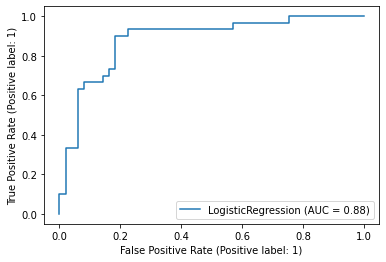

In [71]:
#ROC curve
from sklearn import metrics
metrics.plot_roc_curve(LogRegression, x_test, y_test)

/Users/yzhang/opt/anaconda3/envs/Python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


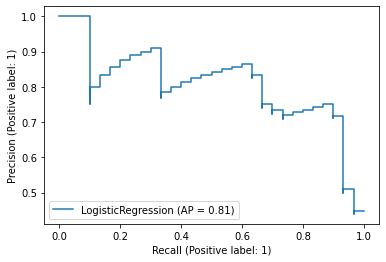

In [72]:
#precision-recall curve
plot_precision_recall_curve(LogRegression, x_test, y_test)

In [73]:
# predict the test data
test_pred = LogRegression.predict(x_test)

In [75]:
accuracy_score(y_test, test_pred)

0.8227848101265823

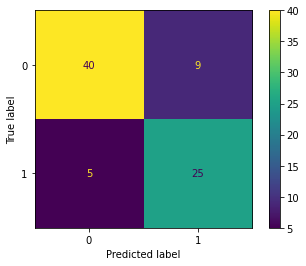

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

In [80]:
# Interpret the Results
print(LogRegression.intercept_)

[-3.61587934]


In [82]:
pd.DataFrame(data={'variable': x_train.columns, 'coefficient': LogRegression.coef_[0]})

,variable,coefficient
0,age,0.016486
1,trestbps,0.000670
2,chol,0.005958
3,thalach,0.005862
4,oldpeak,1.642742
5,sex_1,1.735710
6,cp_2,-4.508552
7,cp_3,-2.794890
8,cp_4,-1.311544
9,fbs_1.0,2.342890
